# 5-a

## Holdout Method

In [15]:
# An example of the Holdout Cross-Validation split

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

# The percentage (as a decimal) of our data that will be training data
TRAIN_SPLIT = 0.7

file_path = '2.1-Exercise.csv'
# Load the csv file
dataframe = pd.read_csv(file_path)

# Split via the holdout method
x_train, x_test, y_train, y_test = train_test_split(
    dataframe, dataframe['Target'], train_size=TRAIN_SPLIT, test_size=1-TRAIN_SPLIT)

print("""\
The holdout method removes a certain portion of the training data and uses it as test data.
Ideally, the data points removed are random on each run.

The following output shows a set of sample diabetes data split into test and training data:
""")

# Print our test and training data
print("Total diabetes data points: {}".format(len(dataframe.index)))
print("# of training data points: {} (~{}%)".format(len(x_train), TRAIN_SPLIT*100))
print("# of test data points: {} (~{}%)\n".format(len(x_test), (1-TRAIN_SPLIT)*100))

print("If you'd like to see the actual data points, uncomment the print statements at the bottom of this script.")
print("Training data:\n{}\n".format(x_train))
print("Test data:\n{}".format(x_test))


The holdout method removes a certain portion of the training data and uses it as test data.
Ideally, the data points removed are random on each run.

The following output shows a set of sample diabetes data split into test and training data:

Total diabetes data points: 329
# of training data points: 230 (~70.0%)
# of test data points: 99 (~30.000000000000004%)

If you'd like to see the actual data points, uncomment the print statements at the bottom of this script.


## K-Fold Cross Validation

In [11]:
# An example of K-Fold Cross Validation split

import numpy
import pandas as pd
from sklearn.model_selection import KFold

# Configurable constants
NUM_SPLITS = 100

# Create some data to perform K-Fold CV on
# data = numpy.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])

file_path = '2.1-Exercise.csv'

data = pd.read_csv(file_path)
data = data.to_numpy()

# Perform a K-Fold split and print results
kfold = KFold(n_splits=NUM_SPLITS)
split_data = kfold.split(data)

print("""\
The K-Fold method works by splitting off 'folds' of test data until every point has been used for testing.

The following output shows the result of splitting some sample data.
A bar displaying the current train-test split as well as the actual data points are displayed for each split.
In the bar, "-" is a training point and "T" is a test point.
""")

print("Data:\n{}\n".format(data))
print('K-Fold split (with n_splits = {}):\n'.format(NUM_SPLITS))

for train, test in split_data:
    output_train = ''
    output_test = ''

    bar = ["-"] * (len(train) + len(test))

    # Build our output for display from the resulting split
    for i in train:
        output_train = "{}({}: {}) ".format(output_train, i, data[i])

    for i in test:
        bar[i] = "T"
        output_test = "{}({}: {}) ".format(output_test, i, data[i])

    print("[ {} ]".format(" ".join(bar)))
    print("Train: {}".format(output_train))
    print("Test:  {}\n".format(output_test))


The K-Fold method works by splitting off 'folds' of test data until every point has been used for testing.

The following output shows the result of splitting some sample data.
A bar displaying the current train-test split as well as the actual data points are displayed for each split.
In the bar, "-" is a training point and "T" is a test point.

Data:
[['2011.11.09' '0:00' 0.9297 ... 0.922 102573 0.925]
 ['2011.11.10' '0:00' 0.922 ... 0.9194 105199 0.9217]
 ['2011.11.11' '0:00' 0.9194 ... 0.9228 94930 0.9218]
 ...
 ['2013.02.11' '0:00' 0.9461 ... 0.9434 66115 0.9436]
 ['2013.02.12' '0:00' 0.9435 ... 0.9447 72565 0.9418]
 ['2013.02.13' '0:00' 0.9448 ... 0.9504 66370 0.9479]]

K-Fold split (with n_splits = 100):

[ T T T T - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

array([['2011.11.09', '0:00', 0.9297, ..., 0.922, 102573, 0.925],
       ['2011.11.10', '0:00', 0.922, ..., 0.9194, 105199, 0.9217],
       ['2011.11.11', '0:00', 0.9194, ..., 0.9228, 94930, 0.9218],
       ...,
       ['2013.02.11', '0:00', 0.9461, ..., 0.9434, 66115, 0.9436],
       ['2013.02.12', '0:00', 0.9435, ..., 0.9447, 72565, 0.9418],
       ['2013.02.13', '0:00', 0.9448, ..., 0.9504, 66370, 0.9479]],
      dtype=object)

## Leave-P-Out / Leave-One-Out Cross Validation

In [ ]:
# Example of LOOCV and LPOCV splitting
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, LeavePOut

# Configurable constants
P_VAL = 30

def print_result(split_data):
    """
    Prints the result of either a LPOCV or LOOCV operation

    Args:
        split_data: The resulting (train, test) split data
    """
    for train, test in split_data:
        output_train = ''
        output_test = ''

        bar = ["-"] * (len(train) + len(test))

        # Build our output for display from the resulting split
        for i in train:
            output_train = "{}({}: {}) ".format(output_train, i, data[i])

        for i in test:
            bar[i] = "T"
            output_test = "{}({}: {}) ".format(output_test, i, data[i])
            
        print("[ {} ]".format(" ".join(bar)))
        print("Train: {}".format(output_train))
        print("Test:  {}\n".format(output_test))


# Create some data to split with
file_path = '2.1-Exercise.csv'

data = pd.read_csv(file_path)
data = data.to_numpy()

# Our two methods
loocv = LeaveOneOut()
lpocv = LeavePOut(p=P_VAL)

split_loocv = loocv.split(data)
split_lpocv = lpocv.split(data)

print("""\
The Leave-P-Out method works by using every combination of P points as test data.

The following output shows the result of splitting some sample data by Leave-One-Out and Leave-P-Out methods.
A bar displaying the current train-test split as well as the actual data points are displayed for each split.
In the bar, "-" is a training point and "T" is a test point.
""")

print("Data:\n{}\n".format(data))

print("Leave-One-Out:\n")
print_result(split_loocv)

print("Leave-P-Out (where p = {}):\n".format(P_VAL))
print_result(split_lpocv)


# 5-b

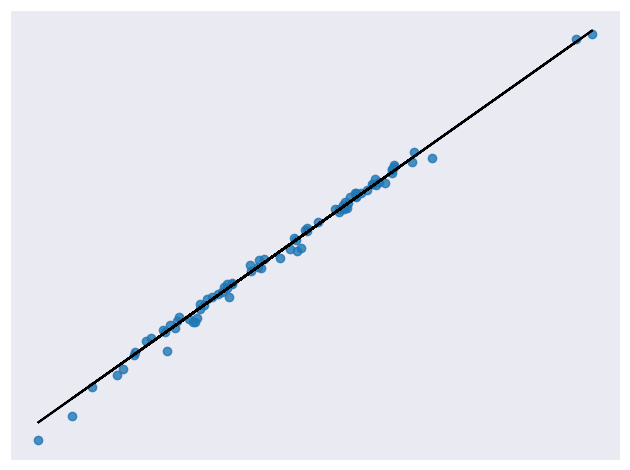

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd


# Create a data set for analysis
file_path = '2.2-Exercise.csv'
df = pd.read_csv(file_path)
x = df['High'].values.reshape(-1, 1)
y = df['Target'].values

# x, y = make_regression(n_samples=500, n_features = 1, noise=25, random_state=0)

# Split the data set into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Create a linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training set
regression.fit(x_train, y_train)

# Make predictions using the testing set
y_predictions = regression.predict(x_test)

# Plot the data
sns.set_style("darkgrid")
sns.regplot(x=x_test.flatten(), y=y_test, fit_reg=False)
plt.plot(x_test, y_predictions, color='black')

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


# 5-c

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "basketball.csv"
df = pd.read_csv(file_path)

# Preprocess the data: Convert categorical columns to numeric using pd.get_dummies
df_encoded = pd.get_dummies(df.drop('play', axis=1))  # Dropping target column 'play' for encoding features
y = df['play'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert 'yes'/'no' to 1/0 for target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.3, random_state=42)

# Create and train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%


# 5-d

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()

# Create feature matrix (X) and target vector (y)
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=10000) 

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Model Accuracy: 97.66%
